<a href="https://colab.research.google.com/github/Risha-art/MAT-422/blob/main/HW_3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**3.3 Unconstrained Optimization**##

In this section, we will derive optimality conditions for unconstrained continuous optimization problems and start with local minimizers.

####**3.3.1 Necessary & Sufficient Conditions of Local Minimizers**####

Ideally, we would like to find a global minimizer to the optimization problem. Often it is diﬀicult to find a global minimizer unless some special structure
is present. Therefore weaker notions of solution have been introduced. The
relationship between global minimizer and local minimizer is shown in Figure
3.8.

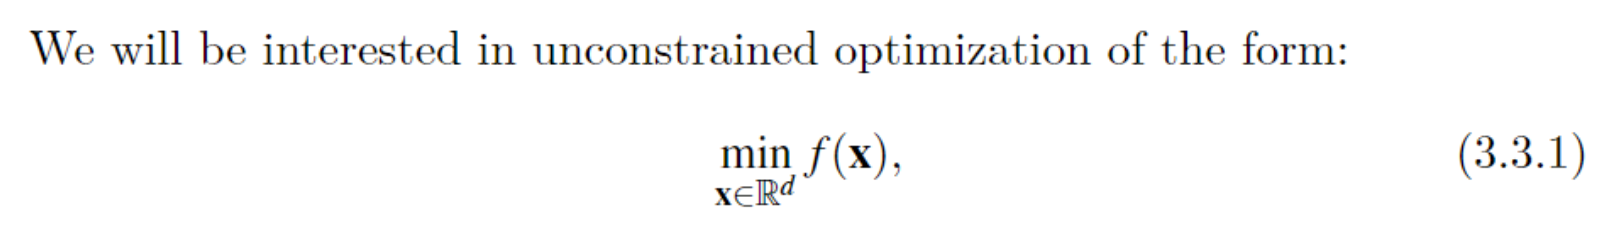

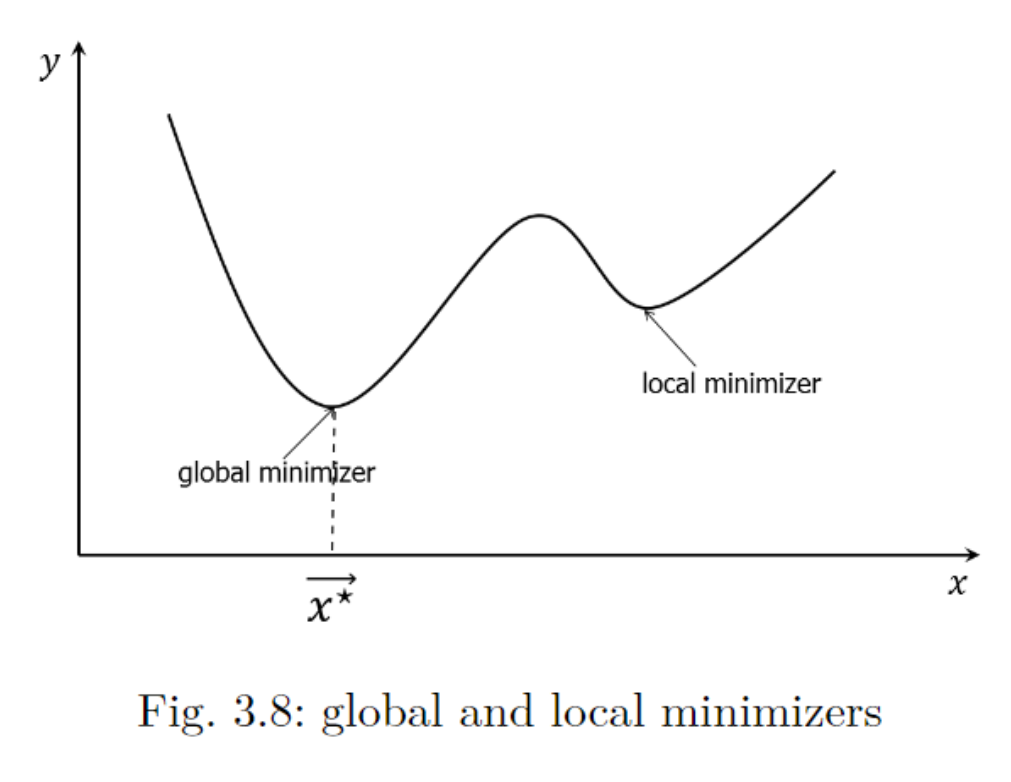

We will characterize local minimizers in terms of the gradient and Hessian of the function. Global optimization aims to find the global minimum of a function within given bounds, in the presence of potentially many local minima. Typically, global minimizers efficiently search the parameter space, while using a local minimizer (e.g., minimize) under the hood. SciPy contains a number of good global optimizers. Here, we’ll use those on the same objective function, namely the (aptly named) eggholder function:

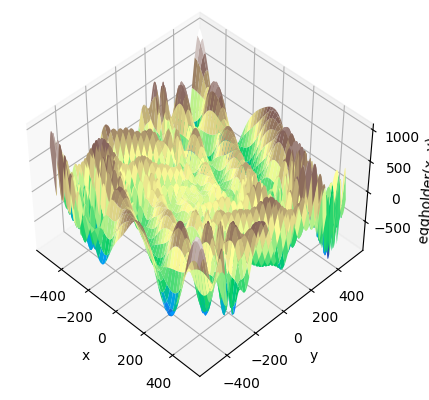

In [3]:
import numpy as np
from scipy.optimize import minimize

def eggholder(x):
    return (-(x[1] + 47) * np.sin(np.sqrt(abs(x[0]/2 + (x[1]  + 47))))-x[0] * np.sin(np.sqrt(abs(x[0] - (x[1]  + 47)))))
bounds = [(-512, 512), (-512, 512)]

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.arange(-512, 513)
y = np.arange(-512, 513)
xgrid, ygrid = np.meshgrid(x, y)
xy = np.stack([xgrid, ygrid])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, -45)
ax.plot_surface(xgrid, ygrid, eggholder(xy), cmap='terrain')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('eggholder(x, y)')
plt.show()

We now use the global optimizers to obtain the minimum and the function value at the minimum. We’ll store the results in a dictionary so we can compare different optimization results later.

####**3.3.2 Convexity and Global Minimizers**####

A real-valued function is called a convex if the line segment between any two points on the graph of the function lies above the graph between the two points. Our optimality conditions previously only concerned local minimizers. In convexity, local minimizers are also global minimizers.

In [4]:
from scipy import optimize
results = dict()
results['shgo'] = optimize.shgo(eggholder, bounds)
results['shgo']

 message: Optimization terminated successfully.
 success: True
     fun: -935.3379515604948
    funl: [-9.353e+02]
       x: [ 4.395e+02  4.540e+02]
      xl: [[ 4.395e+02  4.540e+02]]
     nit: 1
    nfev: 47
   nlfev: 42
   nljev: 10
   nlhev: 0

In [5]:
results['DA'] = optimize.dual_annealing(eggholder, bounds)
results['DA']

 message: ['Maximum number of iteration reached']
 success: True
  status: 0
     fun: -956.9182316200681
       x: [ 4.824e+02  4.329e+02]
     nit: 1000
    nfev: 4148
    njev: 49
    nhev: 0

All optimizers return an OptimizeResult, which in addition to the solution contains information on the number of function evaluations, whether the optimization was successful, and more. For brevity, we won’t show the full output of the other optimizers:

In [11]:
results['DE'] = optimize.differential_evolution(eggholder, bounds)
from scipy import optimize
import numpy as np

# Assuming bounds is a list of tuples like [(-512, 512), (-512, 512)]
# We need to provide a 1D array for x0

# Generate a random initial point within the bounds
x0 = np.array([np.random.uniform(low, high) for low, high in bounds])

# Now call basinhopping with the 1D x0
results['BH'] = optimize.basinhopping(eggholder, x0, minimizer_kwargs={'bounds': bounds})

In [13]:
results['shgo_sobol'] = optimize.shgo(eggholder, bounds, n=200, iters=5, sampling_method='sobol')

We’ll now plot all found minima on a heatmap of the function:

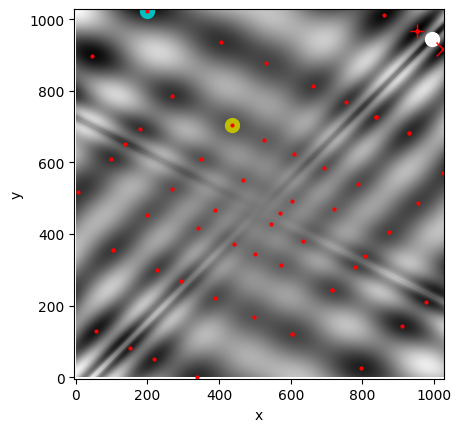

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(eggholder(xy), interpolation='bilinear', origin='lower',
              cmap='gray')
ax.set_xlabel('x')
ax.set_ylabel('y')

def plot_point(res, marker='o', color=None):
    ax.plot(512+res.x[0], 512+res.x[1], marker=marker, color=color, ms=10)

plot_point(results['BH'], color='y')  # basinhopping           - yellow
plot_point(results['DE'], color='c')  # differential_evolution - cyan
plot_point(results['DA'], color='w')  # dual_annealing.        - white

# SHGO produces multiple minima, plot them all (with a smaller marker size)
plot_point(results['shgo'], color='r', marker='+')
plot_point(results['shgo_sobol'], color='r', marker='x')
for i in range(results['shgo_sobol'].xl.shape[0]):
    ax.plot(512 + results['shgo_sobol'].xl[i, 0],
            512 + results['shgo_sobol'].xl[i, 1],
            'ro', ms=2)

ax.set_xlim([-4, 514*2])
ax.set_ylim([-4, 514*2])
plt.show()

Another example can be found with unconstrained optimization using this reference: https://www.youtube.com/watch?v=WYwlyCS8nF8

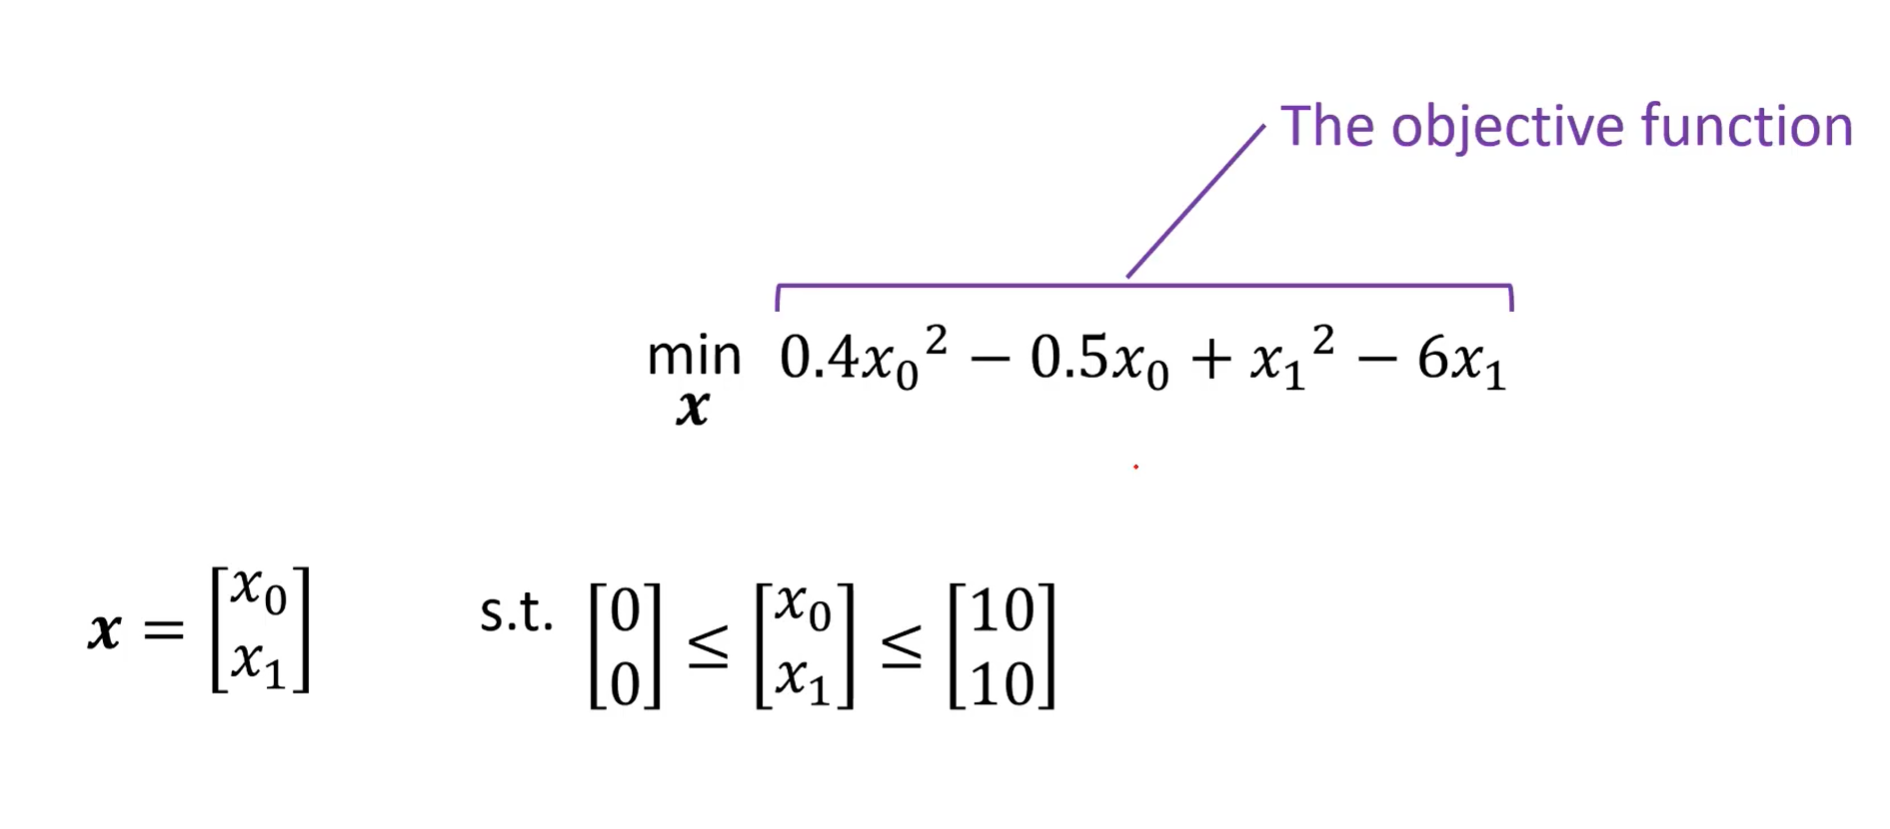

In [16]:
import numpy as np
import matplotlib.pyplot as plt

x0 = np.arange(0, 10, 0.25)
x1 = np.arange(0, 10, 0.25)
X0, X1 = np.meshgrid(x0,x1)

cost = 0.4*X0**2 - 5*X0 + X1**2 - 6*X1

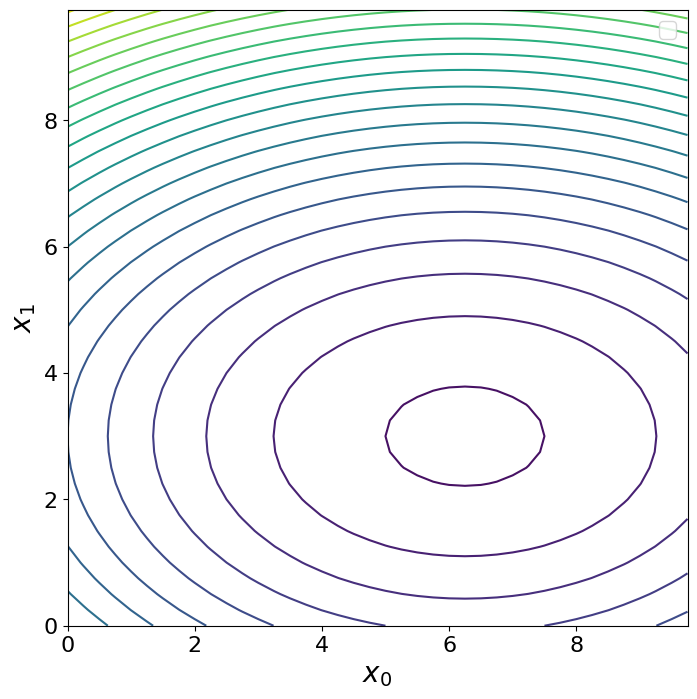

In [17]:
fig,ax=plt.subplots(1,1)
cp = ax.contour(X0, X1, cost, levels = 20)
#fig.colorbar(cp) # Add a colorbar to a plot

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

plt.legend(['train','test'], fontsize=16)

fig = plt.gcf()
fig.set_size_inches(8,8)

ax.set_xlabel('$x_{0}$', fontsize = 20)
ax.set_ylabel('$x_{1}$', fontsize = 20)

plt.show()

In [18]:
from scipy.optimize import minimize

#Define the objective function to minimize (profit function)
def objective_function(x):

  x0 = x[0]
  x1 = x[1]

  return 0.4*x0**2 - 5*x0 + x1**2 - 6*x1

#Definte the bounds for each decision variable
bounds = [(0,10),(0,10)]

#Initial guess for the decision variables
initial_guess = [0,0]

#Perform optimization
opt = minimize(objective_function, initial_guess, method = 'SLSQP', bounds=bounds)

# print the result
print(opt)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -24.624999999151903
       x: [ 6.250e+00  3.000e+00]
     nit: 5
     jac: [ 1.669e-05  5.198e-05]
    nfev: 15
    njev: 5


The information above is telling me:


*   The value of my optimal objective function is -24.6
*   The optimization is successful when x0 = 6.25 and x1 = 3.00



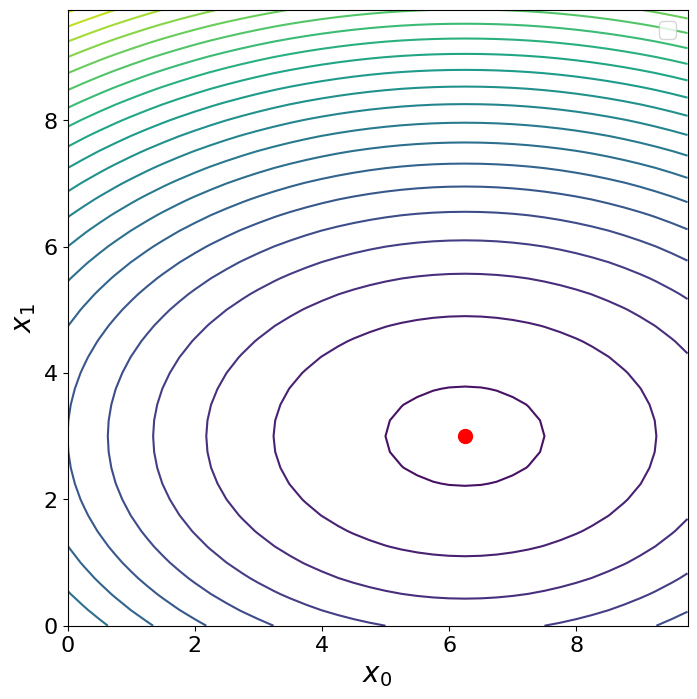

In [20]:
fig,ax=plt.subplots(1,1)
cp = ax.contour(X0, X1, cost, levels=20)

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

plt.legend(['train','test'], fontsize=16)

fig = plt.gcf()
fig.set_size_inches(8,8)

ax.set_xlabel('$x_{0}$', fontsize = 20)
ax.set_ylabel('$x_{1}$', fontsize = 20)

plt.plot(opt.x[0],opt.x[1], 'ro', markersize = 10)

plt.show()

We found the optimimum as denointed by the red dot.

####**3.3.3 Gradient Descent**####

Gradient descent is an iterative optimization algorithm for finding a local minimum of a differentiable function. Once we know a function has a minimizer, we will discuss a class of algorithms known as gradient descent method for solving optimization problems numerically.

Gradient Descent can be applied to any dimension function i.e. 1-D, 2-D, 3-D. In this article, we will be working on finding global minima for parabolic function (2-D) and will be implementing gradient descent in python to find the optimal parameters for the linear regression equation (1-D). To implement a gradient descent algorithm, we require a cost function that needs to be minimized, the number of iterations, a learning rate to determine the step size at each iteration while moving towards the minimum, partial derivatives for weight & bias to update the parameters at each iteration, and a prediction function.

Till now we have seen the parameters required for gradient descent. Now let us map the parameters with the gradient descent algorithm and work on an example to better understand gradient descent. Let us consider a parabolic equation y=4x2. By looking at the equation we can identify that the parabolic function is minimum at x = 0 i.e. at x=0, y=0. Therefore x=0 is the local minima of the parabolic function y=4x2. Now let us see the algorithm for gradient descent and how we can obtain the local minima by applying gradient descent:

Reference: https://www.geeksforgeeks.org/how-to-implement-a-gradient-descent-in-python-to-find-a-local-minimum/

Iteration 1: Cost 4352.088931274409, Weight 		0.7593291142562117, Bias 0.02288558130709
Iteration 2: Cost 1114.8561474350017, Weight 		1.081602958862324, Bias 0.02918014748569513
Iteration 3: Cost 341.42912086804455, Weight 		1.2391274084945083, Bias 0.03225308846928192
Iteration 4: Cost 156.64495290904443, Weight 		1.3161239281746984, Bias 0.03375132986012604
Iteration 5: Cost 112.49704004742098, Weight 		1.3537591652024805, Bias 0.034479873154934775
Iteration 6: Cost 101.9493925395456, Weight 		1.3721549833978113, Bias 0.034832195392868505
Iteration 7: Cost 99.4293893333546, Weight 		1.3811467575154601, Bias 0.03500062439068245
Iteration 8: Cost 98.82731958262897, Weight 		1.3855419247507244, Bias 0.03507916814736111
Iteration 9: Cost 98.68347500997261, Weight 		1.3876903144657764, Bias 0.035113776874486774
Iteration 10: Cost 98.64910780902792, Weight 		1.3887405007983562, Bias 0.035126910596389935
Iteration 11: Cost 98.64089651459352, Weight 		1.389253895811451, Bias 0.0351295475583

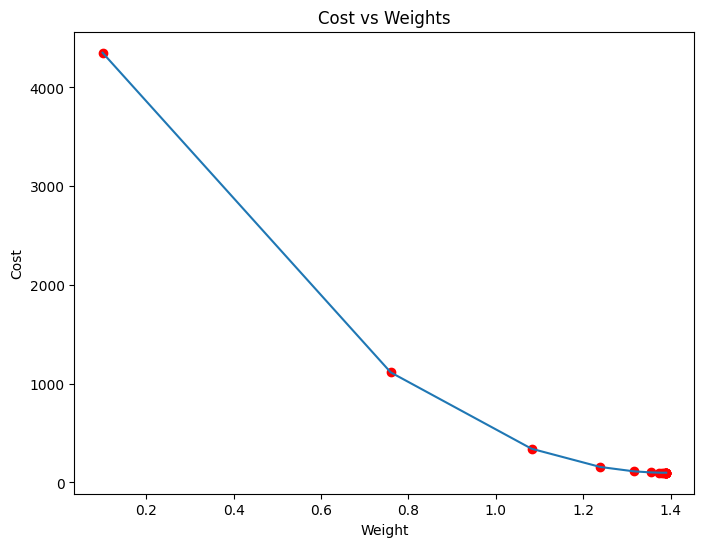

Estimated Weight: 1.389738813163012
Estimated Bias: 0.03509461674147458


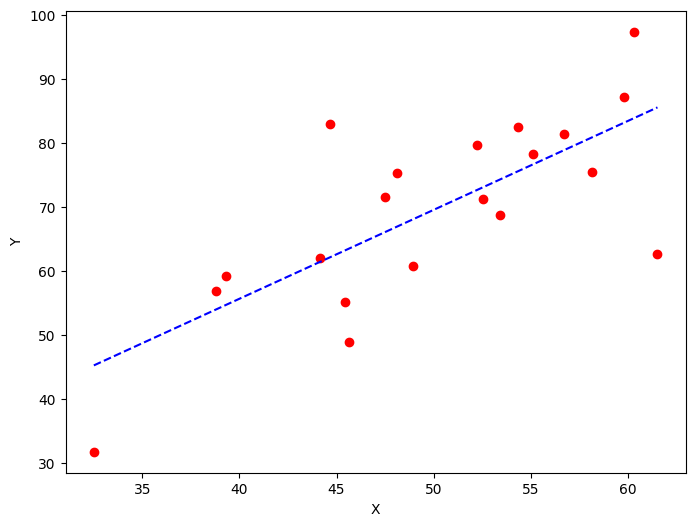

In [21]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt

def mean_squared_error(y_true, y_predicted):

	# Calculating the loss or cost
	cost = np.sum((y_true-y_predicted)**2) / len(y_true)
	return cost

# Gradient Descent Function
# Here iterations, learning_rate, stopping_threshold
# are hyperparameters that can be tuned
def gradient_descent(x, y, iterations = 1000, learning_rate = 0.0001,
					stopping_threshold = 1e-6):

	# Initializing weight, bias, learning rate and iterations
	current_weight = 0.1
	current_bias = 0.01
	iterations = iterations
	learning_rate = learning_rate
	n = float(len(x))

	costs = []
	weights = []
	previous_cost = None

	# Estimation of optimal parameters
	for i in range(iterations):

		# Making predictions
		y_predicted = (current_weight * x) + current_bias

		# Calculating the current cost
		current_cost = mean_squared_error(y, y_predicted)

		# If the change in cost is less than or equal to
		# stopping_threshold we stop the gradient descent
		if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
			break

		previous_cost = current_cost

		costs.append(current_cost)
		weights.append(current_weight)

		# Calculating the gradients
		weight_derivative = -(2/n) * sum(x * (y-y_predicted))
		bias_derivative = -(2/n) * sum(y-y_predicted)

		# Updating weights and bias
		current_weight = current_weight - (learning_rate * weight_derivative)
		current_bias = current_bias - (learning_rate * bias_derivative)

		# Printing the parameters for each 1000th iteration
		print(f"Iteration {i+1}: Cost {current_cost}, Weight \
		{current_weight}, Bias {current_bias}")


	# Visualizing the weights and cost at for all iterations
	plt.figure(figsize = (8,6))
	plt.plot(weights, costs)
	plt.scatter(weights, costs, marker='o', color='red')
	plt.title("Cost vs Weights")
	plt.ylabel("Cost")
	plt.xlabel("Weight")
	plt.show()

	return current_weight, current_bias


def main():

	# Data
	X = np.array([32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,
		55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444,
		45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806,
		48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754])
	Y = np.array([31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
		78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989,
		55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
		60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319])

	# Estimating weight and bias using gradient descent
	estimated_weight, estimated_bias = gradient_descent(X, Y, iterations=2000)
	print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {estimated_bias}")

	# Making predictions using estimated parameters
	Y_pred = estimated_weight*X + estimated_bias

	# Plotting the regression line
	plt.figure(figsize = (8,6))
	plt.scatter(X, Y, marker='o', color='red')
	plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='blue',markerfacecolor='red',
			markersize=10,linestyle='dashed')
	plt.xlabel("X")
	plt.ylabel("Y")
	plt.show()


if __name__=="__main__":
	main()
